In [1]:
# Imports
import os
import numpy as np
from scipy.io import loadmat 
import nibabel as nib
from random import randint
from numpy import savez_compressed

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
#Figure design
params = {'figure.figsize': (8, 8),
          'figure.dpi':300,    
          'figure.titlesize':12,
          'axes.labelsize': 14,
          'axes.titlesize':16,
          'axes.labelpad':1,
          'xtick.labelsize':8,
          'ytick.labelsize':8,
          'legend.fontsize': 12,
          'lines.linewidth': 3,
          'lines.markersize': 6}
plt.rcParams.update(plt.rcParamsDefault) #get back to default parameters
plt.rcParams.update(params)
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18
import matplotlib.style as style 
style.use('seaborn-v0_8-paper')

In [2]:
#Run_order
rootdir_for_datafiles = 'Data/'
rootdir_for_rois = 'Data/'
roi_prfstreams = ['V1', 'V2', 'V3', 'V4','ventral','lateral', 'parietal']

In [3]:
#combining prediction accuracy and layer tuning
subjix=1
foldername = "subj%02d" % subjix
roi_filename=rootdir_for_rois + foldername+ '_roi_voxels_prf_streams_nsdsnrthresholded.nii.gz'
roi_data = nib.load(roi_filename).get_fdata() 
layers = np.unique(roi_data) # 'others','V1', 'V2', 'V3', 'hV4','ventral','lateral', 'parietal'

In [4]:
no_folds=4

In [5]:
colors = plt.cm.turbo(np.linspace(0,1,10))
colors=colors[2:]

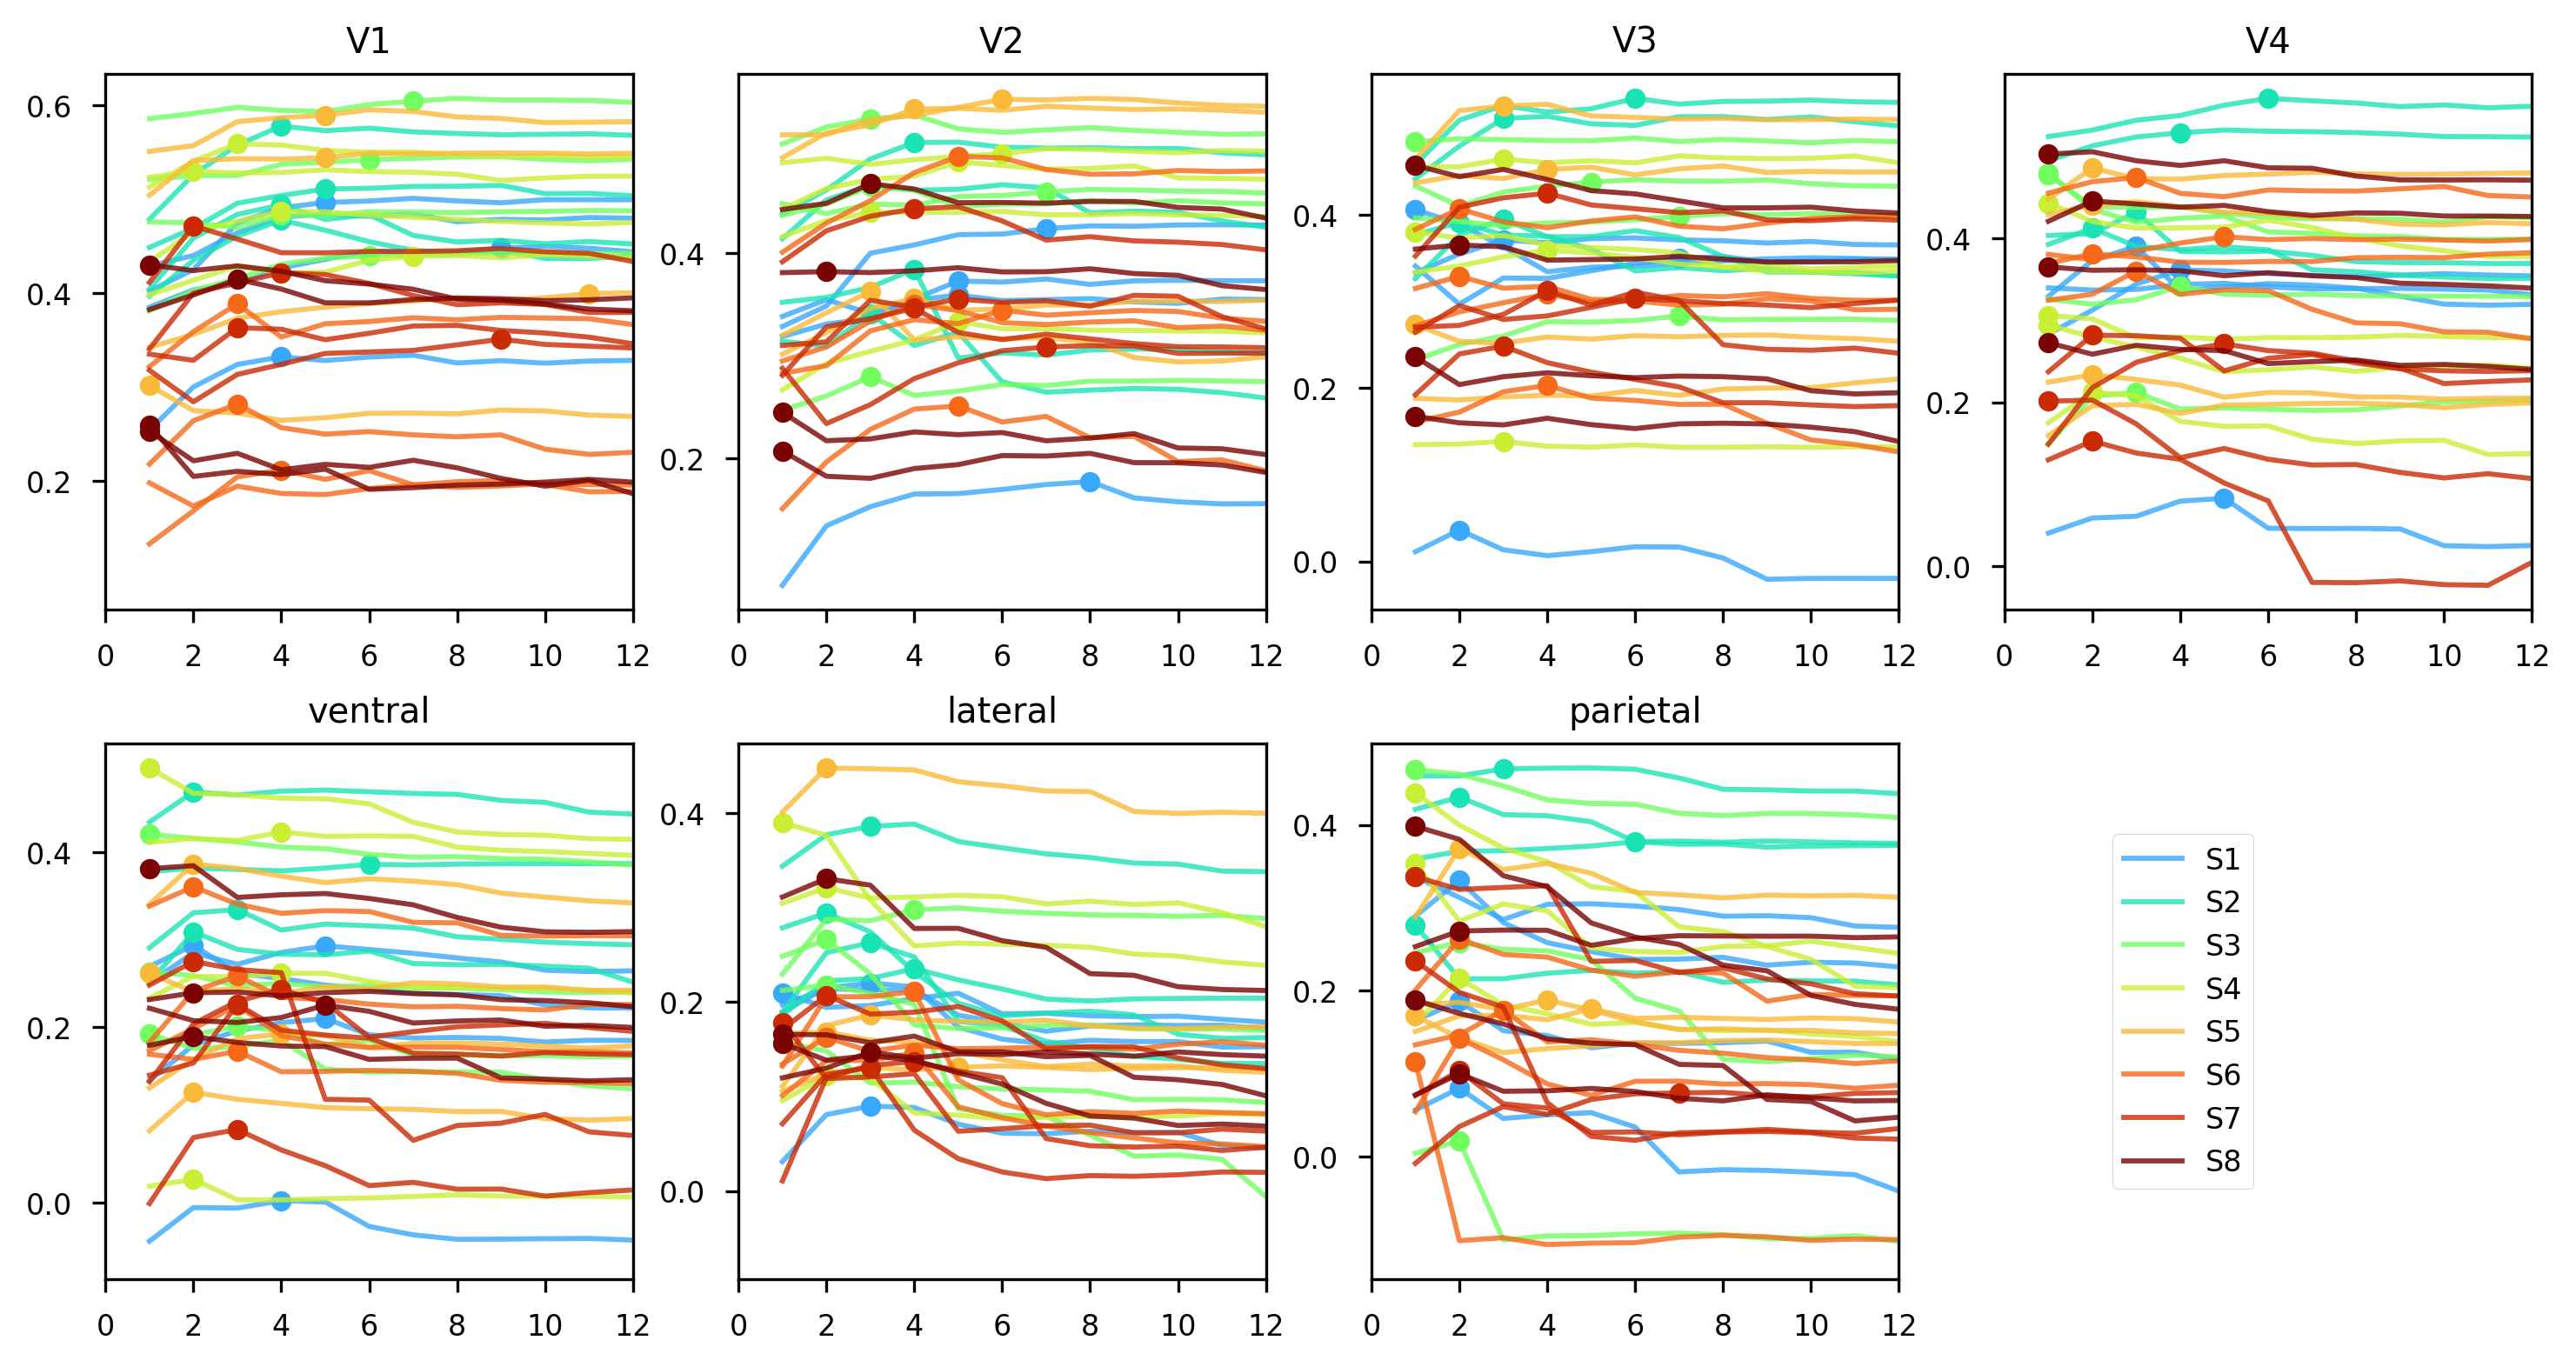

In [6]:
fig = plt.figure(figsize=(12,6))
plt.subplots_adjust(hspace=0.25) 
for tuning in layers[1:]: #0 corresponds to rest of brain voxels - you dont want that
    axs = fig.add_subplot(2, 4, int(tuning))
    axs.title.set_text(roi_prfstreams[int(tuning)-1])
    for subjix in range(1,9):
        filename_marker_vis='vis2vis_prfstreams_testranks_5'+'_sub'+str(subjix)+'_tuning'+str(int(tuning))
        filename_ = rootdir_for_datafiles+ 'multiple_new5_ranks_'+ str(filename_marker_vis)+'.npz'
        ranks =np.load(filename_)['arr_0']
        for f in range(4):
            filename_marker='vis2vis_prfstreams_testranks_5'+'_sub'+str(subjix)+'_tuning'+str(int(tuning))+'_fold'+str(f)
            filename_r = rootdir_for_datafiles+ 'allranks_perfold'+ str(filename_marker)+'.npz' #include fold in filename marker
            r_val=np.load(filename_r)['allrank_r']
            rank_perfold=ranks[f]
            if np.any(r_val>0):
                if f==0:
                    axs.plot(range(1,101),r_val[0:100], color = colors[subjix-1],alpha=0.8, label = 'S'+ str(subjix))
                else:
                    axs.plot(range(1,101),r_val[0:100], color = colors[subjix-1],alpha=0.8, label = '_S'+ str(subjix))
                axs.plot(rank_perfold,r_val[int(rank_perfold-1)], color = colors[subjix-1],marker='o') 
    axs.set_xlim(0, 12)   
    plt.locator_params(axis='x', nbins=6)
    plt.locator_params(axis='y', nbins=4)
axs.legend(bbox_to_anchor=(1.7, 0.5), loc='center right')
plt.show()

7 3
7 3
4 0
7 3
4 0
4 0
7 0


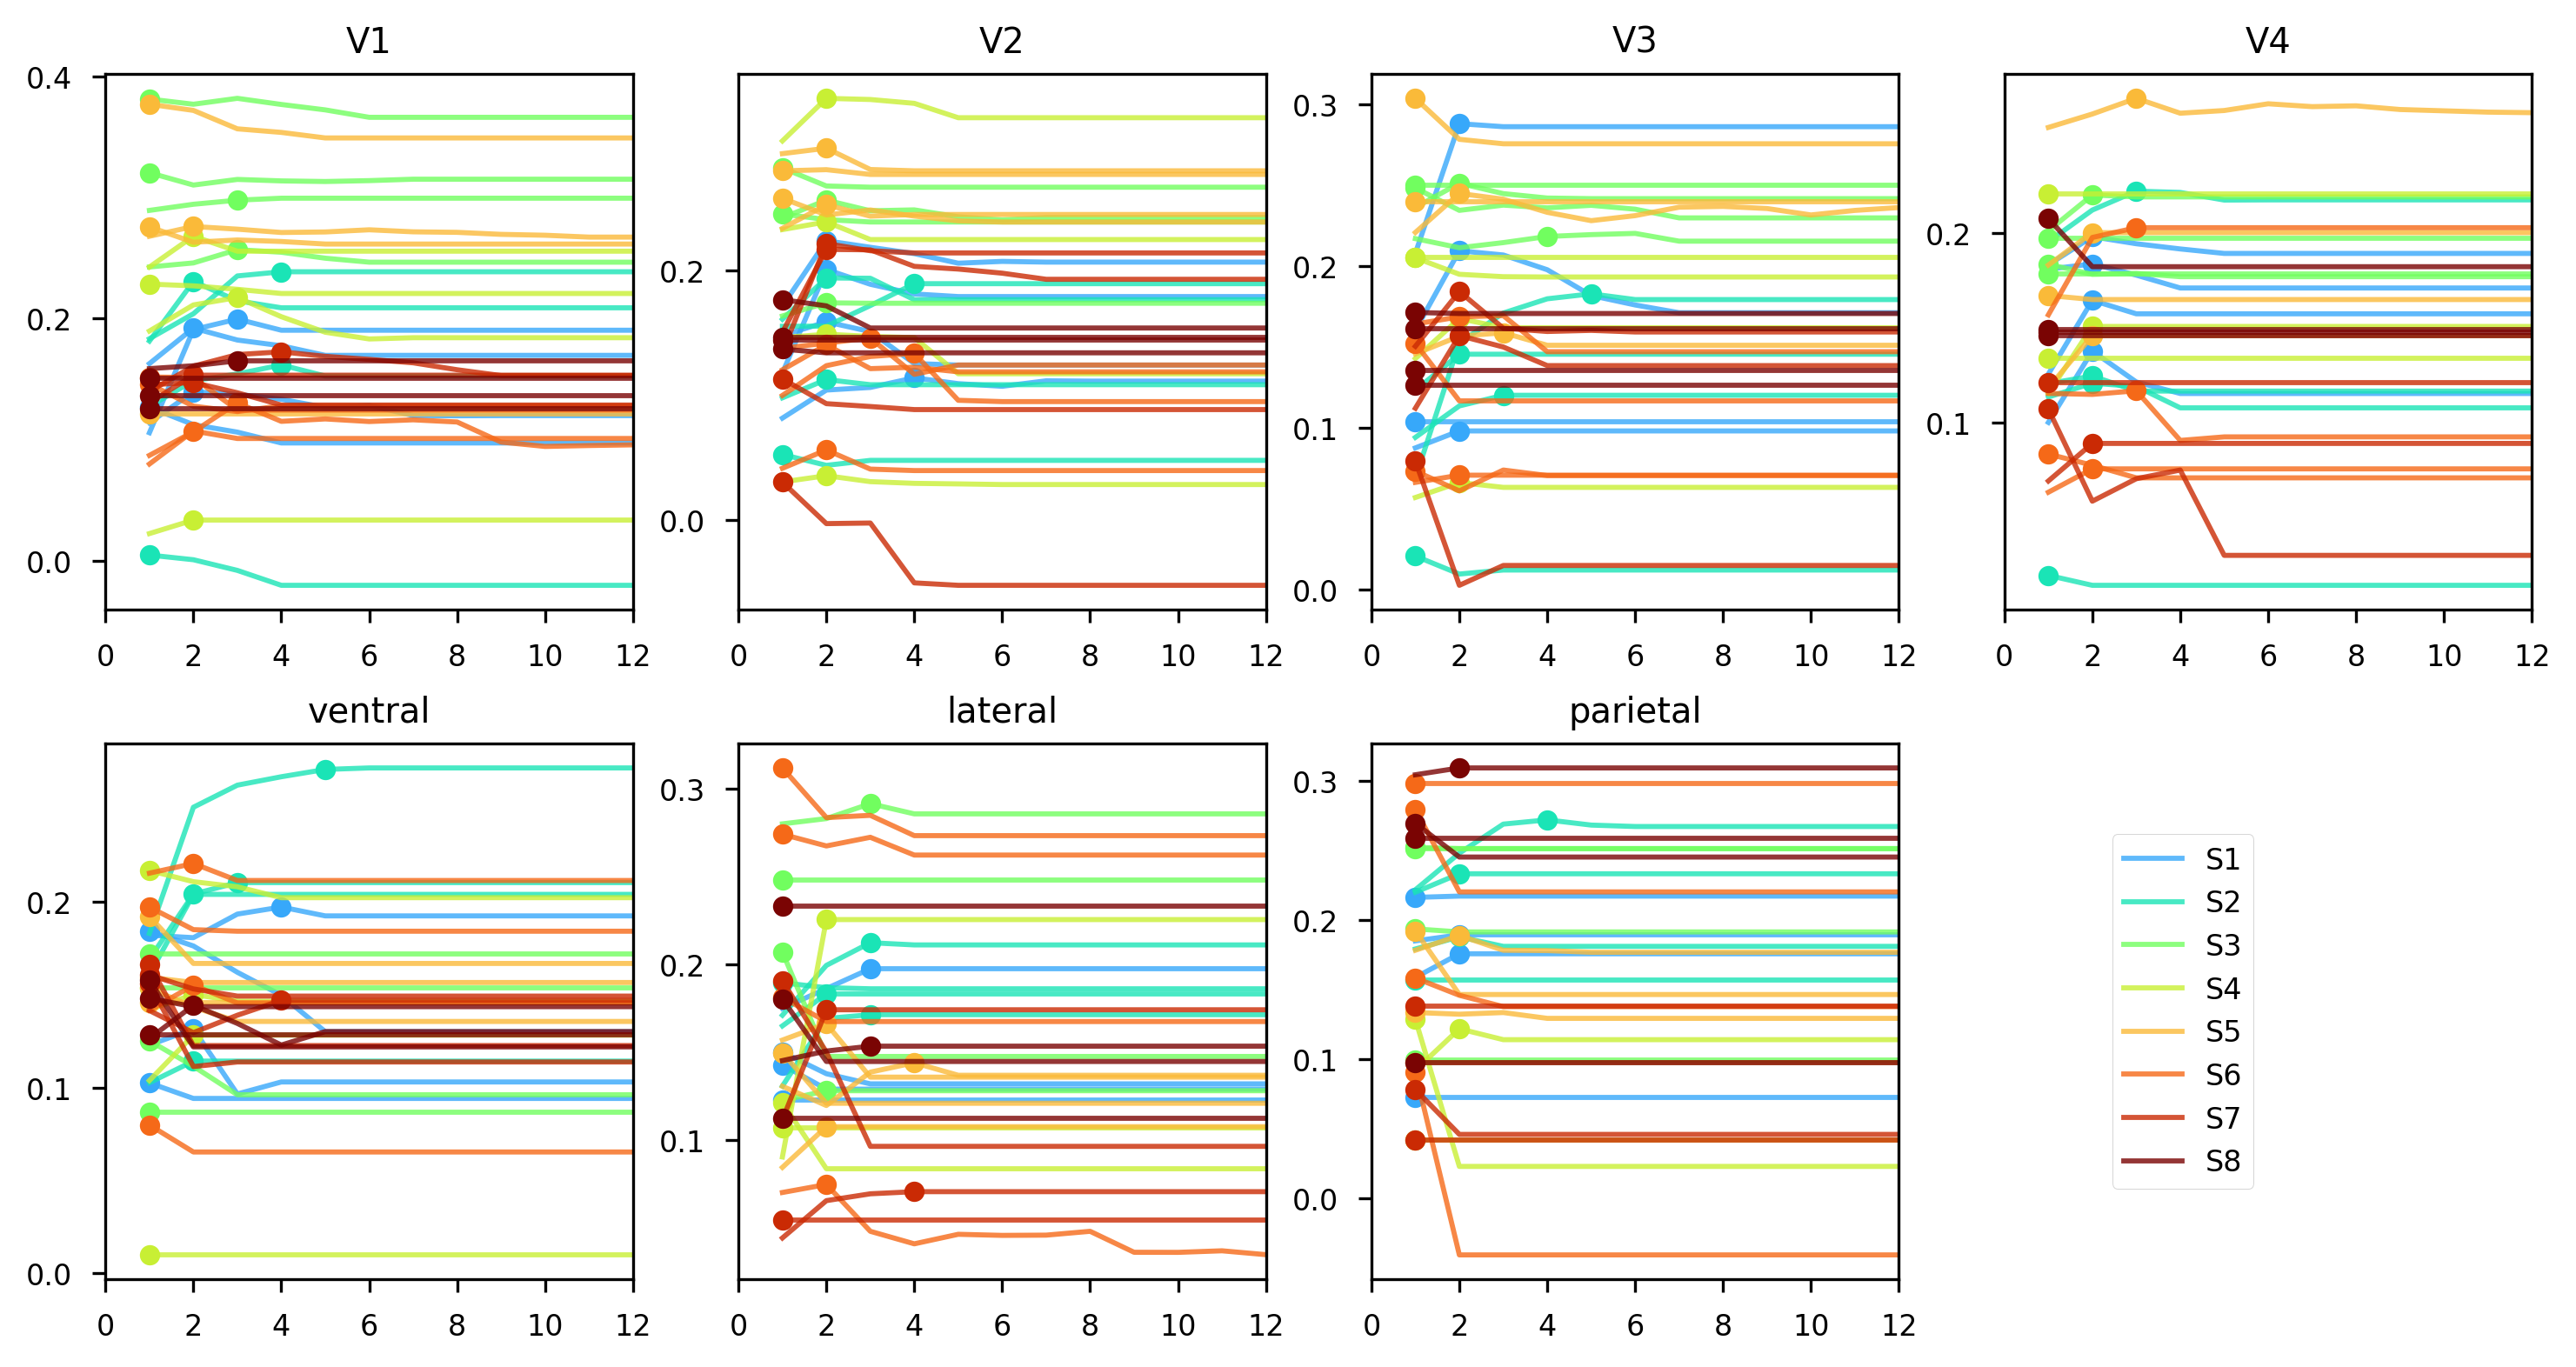

In [7]:
fig = plt.figure(figsize=(12,6))
plt.subplots_adjust(hspace=0.25) 
for tuning in layers[1:]: #0 corresponds to rest of brain voxels - you dont want that
    axs = fig.add_subplot(2, 4, int(tuning))
    axs.title.set_text(roi_prfstreams[int(tuning)-1])
    for subjix in range(1,9):
        filename_marker_img='vis2img_prfstreams_testranks_5'+'_sub'+str(subjix)+'_tuning'+str(int(tuning))
        filename_ = rootdir_for_datafiles+ 'multiple_new5_ranks_'+ str(filename_marker_img)+'.npz'
        ranks =np.load(filename_)['arr_0']
        for f in range(4):
            filename_marker='vis2img_prfstreams_testranks_5'+'_sub'+str(subjix)+'_tuning'+str(int(tuning))+'_fold'+str(f)
            filename_r = rootdir_for_datafiles+ 'allranks_perfold'+ str(filename_marker)+'.npz' #include fold in filename marker
            r_val=np.load(filename_r)['allrank_r']
            rank_perfold=ranks[f]
            if np.any(r_val>0):
                if f==1: #fold 0 is bad for some subjects
                    axs.plot(range(1,101),r_val[0:100], color = colors[subjix-1],alpha=0.8, label = 'S'+ str(subjix))
                else:
                    axs.plot(range(1,101),r_val[0:100], color = colors[subjix-1],alpha=0.8, label = '_S'+ str(subjix))
                axs.plot(rank_perfold,r_val[int(rank_perfold-1)], color = colors[subjix-1],marker='o')  
            else:
                print(subjix,f)
    axs.set_xlim(0, 12)  
    plt.locator_params(axis='x', nbins=6)
    plt.locator_params(axis='y', nbins=4)
axs.legend(bbox_to_anchor=(1.7, 0.5), loc='center right')
plt.show()

In [8]:
style.use('bmh')

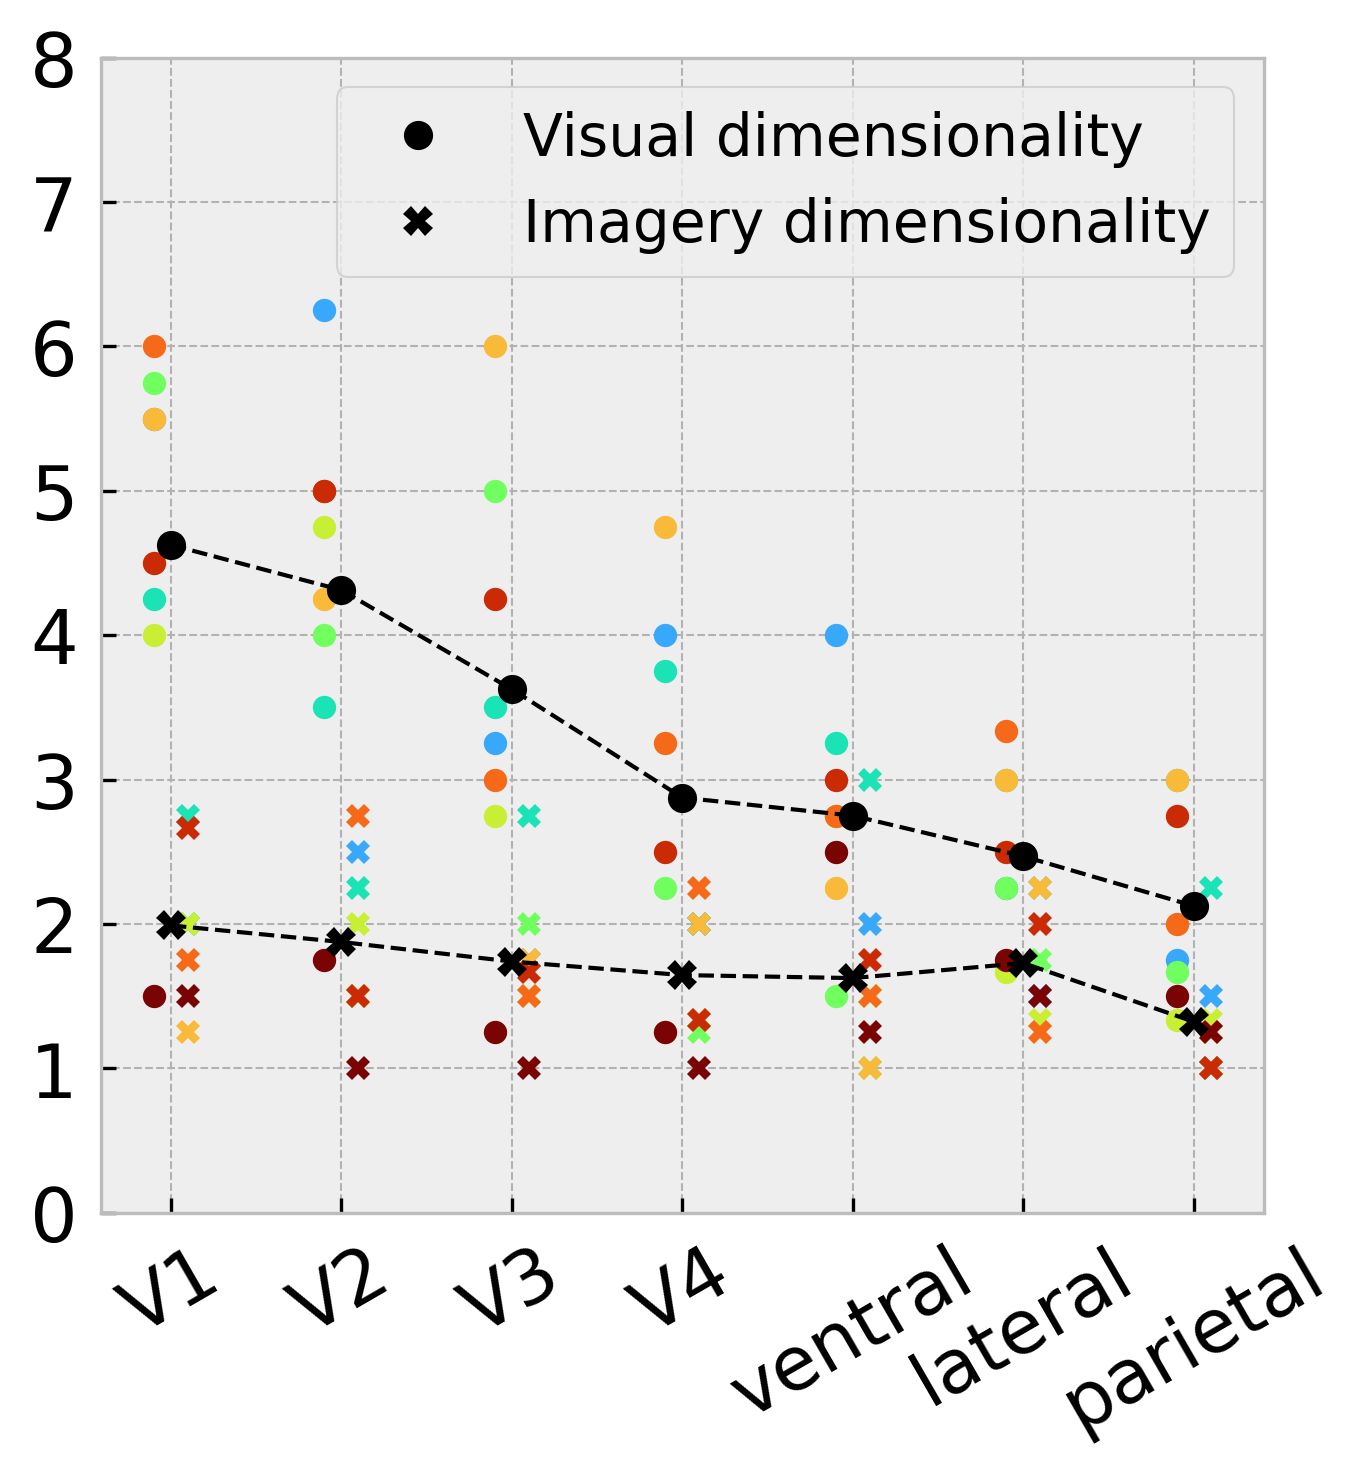

In [9]:
fig = plt.figure(figsize=(5,5))
jitter =np.arange(-0.2,0.2,0.1)
mean_rank_vis=np.zeros(7)
mean_rank_img=np.zeros(7)
for tuning in layers[1:]:
    for subjix in range(1,9):
        filename_marker_vis='vis2vis_prfstreams_testranks_5'+'_sub'+str(subjix)+'_tuning'+str(int(tuning))
        filename_ = rootdir_for_datafiles+ 'multiple_new5_ranks_'+ str(filename_marker_vis)+'.npz'
        ranks =np.load(filename_)['arr_0']
        x_vis = tuning
        y=[]
        for f in range(4):
            filename_marker='vis2vis_prfstreams_testranks_5'+'_sub'+str(subjix)+'_tuning'+str(int(tuning))+'_fold'+str(f)
            filename_r = rootdir_for_datafiles+ 'allranks_perfold'+ str(filename_marker)+'.npz' #include fold in filename marker
            r_val=np.load(filename_r)['allrank_r']
            if np.any(r_val>0):
                y.append(ranks[f])
        y_vis=np.mean(y)
        mean_rank_vis[int(tuning)-1]=mean_rank_vis[int(tuning)-1]+y_vis
        plt.plot(x_vis-0.1,y_vis,color=colors[subjix-1],marker='o', label = '_S'+ str(subjix))     
        filename_marker_img='vis2img_prfstreams_testranks_5'+'_sub'+str(subjix)+'_tuning'+str(int(tuning))
        filename_ = rootdir_for_datafiles+ 'multiple_new5_ranks_'+ str(filename_marker_img)+'.npz'
        ranks =np.load(filename_)['arr_0']
        x_img = tuning
        y=[]
        for f in range(4):
            filename_marker='vis2img_prfstreams_testranks_5'+'_sub'+str(subjix)+'_tuning'+str(int(tuning))+'_fold'+str(f)
            filename_r = rootdir_for_datafiles+ 'allranks_perfold'+ str(filename_marker)+'.npz' #include fold in filename marker
            r_val=np.load(filename_r)['allrank_r']
            if np.any(r_val>0):
                y.append(ranks[f])
        y_img=np.mean(y)
        mean_rank_img[int(tuning)-1]=mean_rank_img[int(tuning)-1]+y_img
        plt.plot(x_img+0.1,y_img,color=colors[subjix-1],marker='X', label = '_S'+ str(subjix))    
plt.xticks(np.arange(1,8),roi_prfstreams,ha="center",rotation = 30,fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([0,8])
mean_rank_vis=mean_rank_vis/8
mean_rank_img=mean_rank_img/8
line1,=plt.plot(np.arange(1,8),mean_rank_vis,color='black', marker='o',markerfacecolor='black',linestyle='--',linewidth=1,markersize=7)
line2,=plt.plot(np.arange(1,8),mean_rank_img,color='black', marker='X',markerfacecolor='black',linestyle='--',linewidth=1,markersize=7)
marker1 = mlines.Line2D([], [], color='black', marker='o', markersize=7,linestyle='None', label='Visual dimensionality')
marker2 = mlines.Line2D([], [], color='black', marker='X', markersize=7,linestyle='None', label='Imagery dimensionality')
plt.legend(handles=[marker1, marker2],fontsize=14)
plt.show()